In [1]:
import numpy as np
import pandas as pd

In [2]:
greenhouse = pd.read_csv('data/Annual Greenhouse Gas (GHG) Air Emissions Accounts.csv')
greenhouse.head()

# let's show NA values
greenhouse.isna().sum()


Country        0
ISO2        1186
ISO3           0
Industry       0
Gas_Type       0
F2010          0
F2011          0
F2012          0
F2013          0
F2014          0
F2015          0
F2016          0
F2017          0
F2018          0
F2019          0
F2020          0
F2021          0
F2022          0
dtype: int64

In [3]:
# dropping ISO2 column, since there's nothing in it
greenhouse = greenhouse.drop('ISO2', axis=1)
greenhouse.head(5)

,Country,ISO3,Industry,Gas_Type,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Carbon dioxide,194.398492,191.201537,192.473034,190.048764,190.966649,193.338608,187.562070,189.440100,188.437327,187.905257,182.266715,187.438675,184.520601
1,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Fluorinated gases,0.900844,0.948342,0.955449,1.029110,0.986873,1.011099,0.963934,0.950728,0.821667,0.783003,0.747345,0.702196,0.707047
2,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Greenhouse gas,1370.031102,1350.212366,1334.456632,1377.599894,1392.829858,1400.464829,1361.477669,1369.628014,1378.475201,1375.349001,1338.959570,1344.523950,1330.550899
3,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Methane,641.415104,636.893906,637.064644,633.493095,633.856107,639.263923,633.542996,639.543088,641.580792,634.344665,631.733383,630.457326,621.965004
4,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Nitrous oxide,533.316661,521.168581,503.963505,553.028925,567.020229,566.851200,539.408671,539.694098,547.635416,552.316076,524.212127,525.925753,523.358247


In [4]:
# only look at entries with methane emissions

methane = greenhouse[greenhouse['Gas_Type'] == 'Methane']

In [5]:
methane.head(5)

,Country,ISO3,Industry,Gas_Type,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
3,Advanced Economies,AETMP,"Agriculture, Forestry and Fishing",Methane,641.415104,636.893906,637.064644,633.493095,633.856107,639.263923,633.542996,639.543088,641.580792,634.344665,631.733383,630.457326,621.965004
8,Advanced Economies,AETMP,Construction,Methane,0.786723,0.679102,0.677564,0.698654,0.749750,0.796775,0.705073,0.703243,0.693586,0.714401,0.713934,0.723343,0.729393
13,Advanced Economies,AETMP,"Electricity, Gas, Steam and Air Conditioning S...",Methane,118.663771,107.668565,103.911388,104.069273,101.130145,116.206189,123.656386,114.993450,111.906396,113.670220,121.280961,119.286500,122.784143
18,Advanced Economies,AETMP,Manufacturing,Methane,28.583180,31.081786,30.380028,30.895839,29.007371,24.756002,18.327287,19.288280,19.939480,19.193776,16.467733,16.771598,17.098939
23,Advanced Economies,AETMP,Mining,Methane,309.006786,305.745514,306.013481,304.601820,303.864259,284.161701,256.137784,265.770456,270.783097,255.835836,222.081568,213.120300,218.887405


/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

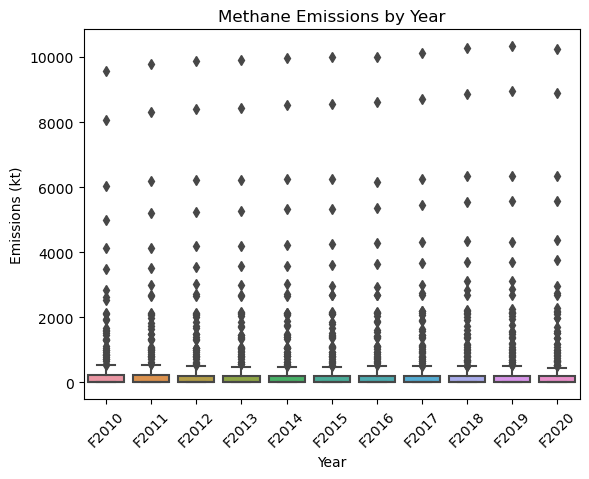

In [14]:
# looking at outliers

import matplotlib.pyplot as plt
import seaborn as sns

# let's create a boxplot of F2010 through F2022 using seaborn
sns.boxplot(data=methane.iloc[:, 3:15])
plt.xticks(rotation=45)
plt.title('Methane Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Emissions (kt)')
plt.show()

In [7]:
# applying normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
methane_scaled = scaler.fit_transform(methane[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']])
methane_scaled = pd.DataFrame(methane_scaled, columns=['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022'])
methane_scaled.head(5)

,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,0.067009,0.065134,0.064489,0.063983,0.063630,0.063993,0.063284,0.063149,0.062386,0.061384,0.061665,0.060655,0.058753
1,0.000082,0.000069,0.000068,0.000070,0.000075,0.000080,0.000070,0.000069,0.000067,0.000069,0.000070,0.000069,0.000069
2,0.012397,0.011011,0.010519,0.010511,0.010152,0.011633,0.012352,0.011354,0.010881,0.011000,0.011838,0.011476,0.011598
3,0.002986,0.003179,0.003075,0.003120,0.002912,0.002478,0.001831,0.001904,0.001939,0.001857,0.001607,0.001613,0.001615
4,0.032282,0.031268,0.030977,0.030765,0.030504,0.028446,0.025585,0.026242,0.026330,0.024757,0.021678,0.020504,0.020677
